In [1]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [2]:
import loompy

In [3]:
import velocyto as vcy
import logging
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.interpolate import interp1d

In [4]:
logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)
%matplotlib inline
plt.rcParams['pdf.fonttype'] = 42

2019-06-23 21:34:20,915 - DEBUG - backend module://ipykernel.pylab.backend_inline version unknown


In [5]:
# plotting utility functions

def despline():
    ax1 = plt.gca()
    # Hide the right and top spines
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    # Only show ticks on the left and bottom spines
    ax1.yaxis.set_ticks_position('left')
    ax1.xaxis.set_ticks_position('bottom')
    
def minimal_xticks(start, end):
    end_ = np.around(end, -int(np.log10(end))+1)
    xlims = np.linspace(start, end_, 5)
    xlims_tx = [""]*len(xlims)
    xlims_tx[0], xlims_tx[-1] = f"{xlims[0]:.0f}", f"{xlims[-1]:.02f}"
    plt.xticks(xlims, xlims_tx)

    
def minimal_yticks(start, end):
    end_ = np.around(end, -int(np.log10(end))+1)
    ylims = np.linspace(start, end_, 5)
    ylims_tx = [""]*len(ylims)
    ylims_tx[0], ylims_tx[-1] = f"{ylims[0]:.0f}", f"{ylims[-1]:.02f}"
    plt.yticks(ylims, ylims_tx)

In [ ]:
# To connect 4 loom files for E16_Dec7 data

In [276]:
import os

In [277]:
cwd = os.getcwd()
print (cwd)

/home/ubuntu/velocyto


In [286]:
dir_list=next(os.walk('Dec_trachea/E16_Dec7_combined_v3/'))[1]

In [287]:
print(dir_list)

['E16_Dec7_mut_7', 'E16_Dec7_wt_6', 'E16_Dec7_wt_1', 'E16_Dec7_mut_8']


In [18]:
#os.chdir("/home/ubuntu/velocyto")
#cwd = os.getcwd()
#print (cwd)

In [288]:
E16_Dec7_mut_7_cv3 = loompy.connect("Dec_trachea/E16_Dec7_combined_v3/E16_Dec7_mut_7/velocyto/E16_Dec7_mut_7.loom")

In [289]:
E16_Dec7_mut_7_cv3

,,,,,,CellID,E16_Dec7_mut_7:AAAGATGAGCCATCGCx,E16_Dec7_mut_7:AAAGTAGAGAGTACATx,E16_Dec7_mut_7:AAACCTGGTGTAAGTAx,E16_Dec7_mut_7:AAAGATGTCCGCAAGCx,E16_Dec7_mut_7:AAACCTGCACCTGGTGx,E16_Dec7_mut_7:AAAGATGGTTCAGGCCx,E16_Dec7_mut_7:AAACGGGGTCAGTGGAx,E16_Dec7_mut_7:AAAGATGGTACAGTGGx,E16_Dec7_mut_7:AAATGCCAGAAGAAGCx,E16_Dec7_mut_7:AAAGTAGCATGGTTGTx,...
Accession,Chromosome,End,Gene,Start,Strand,,,,,,,,,,,,...
ENSMUSG00000051951,1,3671498,Xkr4,3205901,-,,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...
ENSMUSG00000103377,1,3368549,Gm37180,3365731,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...
ENSMUSG00000104017,1,3377788,Gm37363,3375556,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...
ENSMUSG00000103025,1,3467285,Gm37686,3464977,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...
ENSMUSG00000103201,1,3514507,Gm37329,3512451,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...
ENSMUSG00000103161,1,3595903,Gm38148,3592892,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...
ENSMUSG00000102331,1,3658904,Gm19938,3647309,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...
ENSMUSG00000088333,1,3783933,Gm27396,3783876,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...
ENSMUSG00000102343,1,3986215,Gm37381,3905739,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...


In [290]:
E16_Dec7_mut_8_cv3 = loompy.connect("Dec_trachea/E16_Dec7_combined_v3/E16_Dec7_mut_8/velocyto/E16_Dec7_mut_8.loom")

In [291]:
E16_Dec7_mut_8_cv3

,,,,,,CellID,E16_Dec7_mut_8:AAAGTAGTCGGAATCTx,E16_Dec7_mut_8:AAACGGGCATCGATTGx,E16_Dec7_mut_8:AAAGTAGTCAGGCAAGx,E16_Dec7_mut_8:AAAGCAATCGAGAACGx,E16_Dec7_mut_8:AAAGCAAAGTTCGCATx,E16_Dec7_mut_8:AAATGCCAGTGAAGAGx,E16_Dec7_mut_8:AAAGCAATCAAGCCTAx,E16_Dec7_mut_8:AAACGGGTCATGCATGx,E16_Dec7_mut_8:AAAGCAACACTGTCGGx,E16_Dec7_mut_8:AAATGCCGTCGAGATGx,...
Accession,Chromosome,End,Gene,Start,Strand,,,,,,,,,,,,...
ENSMUSG00000051951,1,3671498,Xkr4,3205901,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...
ENSMUSG00000103377,1,3368549,Gm37180,3365731,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...
ENSMUSG00000104017,1,3377788,Gm37363,3375556,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...
ENSMUSG00000103025,1,3467285,Gm37686,3464977,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...
ENSMUSG00000103201,1,3514507,Gm37329,3512451,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...
ENSMUSG00000103161,1,3595903,Gm38148,3592892,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...
ENSMUSG00000102331,1,3658904,Gm19938,3647309,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...
ENSMUSG00000088333,1,3783933,Gm27396,3783876,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...
ENSMUSG00000102343,1,3986215,Gm37381,3905739,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...


In [292]:
#access the layer named "unspliced"
E16_Dec7_mut_8_cv3["unspliced"][:,:]

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 5, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [293]:
#there is another layer named "spliced"
E16_Dec7_mut_8_cv3["spliced"][:,:]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [2, 5, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [294]:
#The main layer. spliced+unspliced.
E16_Dec7_mut_8_cv3[""][:,:]

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [3., 5., 0., ..., 6., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [295]:
E16_Dec7_wt_1_cv3 = loompy.connect("Dec_trachea/E16_Dec7_combined_v3/E16_Dec7_wt_1/velocyto/E16_Dec7_wt_1.loom")

In [296]:
E16_Dec7_wt_6_cv3 = loompy.connect("Dec_trachea/E16_Dec7_combined_v3/E16_Dec7_wt_6/velocyto/E16_Dec7_wt_6.loom")

In [32]:
import glob

In [297]:
E16_Dec_combined_loomList=glob.glob("Dec_trachea/E16_Dec7_combined_v3/**/*.loom", recursive=True)

In [298]:
E16_Dec_combined_loomList

['Dec_trachea/E16_Dec7_combined_v3/E16_Dec7_mut_7/velocyto/E16_Dec7_mut_7.loom',
 'Dec_trachea/E16_Dec7_combined_v3/E16_Dec7_wt_6/velocyto/E16_Dec7_wt_6.loom',
 'Dec_trachea/E16_Dec7_combined_v3/E16_Dec7_wt_1/velocyto/E16_Dec7_wt_1.loom',
 'Dec_trachea/E16_Dec7_combined_v3/E16_Dec7_mut_8/velocyto/E16_Dec7_mut_8.loom']

In [299]:
loompy.combine(E16_Dec_combined_loomList, "Dec_trachea/E16_Dec7_combined_v3/E16_Dec_combined_v3.loom", key="Accession")

2019-02-04 18:15:14,583 - WARNING - ╭── 'batch_scan_layers' is deprecated. Use 'scan' instead
2019-02-04 18:15:14,584 - WARNING - ╰──> at /home/ubuntu/miniconda3/envs/velocyto/lib/python3.6/site-packages/loompy/loompy.py, line 471
2019-02-04 18:16:26,685 - WARNING - ╭── 'batch_scan_layers' is deprecated. Use 'scan' instead
2019-02-04 18:16:26,686 - WARNING - ╰──> at /home/ubuntu/miniconda3/envs/velocyto/lib/python3.6/site-packages/loompy/loompy.py, line 471
2019-02-04 18:17:15,581 - WARNING - ╭── 'batch_scan_layers' is deprecated. Use 'scan' instead
2019-02-04 18:17:15,582 - WARNING - ╰──> at /home/ubuntu/miniconda3/envs/velocyto/lib/python3.6/site-packages/loompy/loompy.py, line 471


In [ ]:
# There were 4 loom files each of which corresponds to a 10X channel. Now I have combined all 4, and made a joint loom file "E16_Dec_combined_v3.loom"

In [ ]:
# In the future, I will only need to access the combined loom file, skipping the scripts above.

In [300]:
E16_Dec_cv3Loom = loompy.connect("Dec_trachea/E16_Dec7_combined_v3/E16_Dec_combined_v3.loom")

In [301]:
E16_Dec_cv3Loom

,,,,,,CellID,E16_Dec7_mut_7:AAAGATGAGCCATCGCx,E16_Dec7_mut_7:AAAGTAGAGAGTACATx,E16_Dec7_mut_7:AAACCTGGTGTAAGTAx,E16_Dec7_mut_7:AAAGATGTCCGCAAGCx,E16_Dec7_mut_7:AAACCTGCACCTGGTGx,E16_Dec7_mut_7:AAAGATGGTTCAGGCCx,E16_Dec7_mut_7:AAACGGGGTCAGTGGAx,E16_Dec7_mut_7:AAAGATGGTACAGTGGx,E16_Dec7_mut_7:AAATGCCAGAAGAAGCx,E16_Dec7_mut_7:AAAGTAGCATGGTTGTx,...
Accession,Chromosome,End,Gene,Start,Strand,,,,,,,,,,,,...
ENSMUSG00000051951,1,3671498,Xkr4,3205901,-,,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...
ENSMUSG00000103377,1,3368549,Gm37180,3365731,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...
ENSMUSG00000104017,1,3377788,Gm37363,3375556,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...
ENSMUSG00000103025,1,3467285,Gm37686,3464977,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...
ENSMUSG00000103201,1,3514507,Gm37329,3512451,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...
ENSMUSG00000103161,1,3595903,Gm38148,3592892,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...
ENSMUSG00000102331,1,3658904,Gm19938,3647309,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...
ENSMUSG00000088333,1,3783933,Gm27396,3783876,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...
ENSMUSG00000102343,1,3986215,Gm37381,3905739,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...


In [357]:

E16_Dec_cv3Loom["spliced"][:,:]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [358]:

E16_Dec_cv3Loom["unspliced"][:,:]

array([[0, 6, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 5, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [302]:
E16_Dec_cv3_ID=E16_Dec_cv3Loom.ca["CellID"]

In [303]:
print(E16_Dec_cv3_ID)

['E16_Dec7_mut_7:AAAGATGAGCCATCGCx' 'E16_Dec7_mut_7:AAAGTAGAGAGTACATx'
 'E16_Dec7_mut_7:AAACCTGGTGTAAGTAx' ... 'E16_Dec7_mut_8:TTTGTCATCTTGAGGTx'
 'E16_Dec7_mut_8:TTTGTCATCGAATGGGx' 'E16_Dec7_mut_8:TTTGTCATCCTCCTAGx']


In [304]:
type(E16_Dec_cv3_ID)

numpy.ndarray

In [305]:
len(E16_Dec_cv3_ID)

30897

In [306]:
E16_Dec_cv3_ID.tofile('Dec_trachea/E16_Dec7_combined_v3/E16_Dec_cv3_ID.csv',sep=',',format='%s')

In [45]:
#This csv file provides cell names in its own order. I will use this csv file to get corresponding cells' embedding coordinates (TSNE) from seurat


In [ ]:
#TSNE coordinates are written in TSNE1_Loomorder_epi.csv and TSNE2_Loomorder_epi.csv

In [307]:
import pandas as pd

In [362]:
E16_Dec_cv3_TSNE1_epi = pd.read_csv("Dec_trachea/E16_Dec7_combined_v3/TSNE1_Loomorder_epi.csv",header=None)


In [ ]:
# NA means those cells are not in the epithelial subset

In [363]:
print(E16_Dec_cv3_TSNE1_epi)

               0
0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6      -0.102612
7            NaN
8            NaN
9            NaN
10           NaN
11           NaN
12     10.862070
13           NaN
14           NaN
15           NaN
16     -3.924487
17           NaN
18           NaN
19      6.437253
20           NaN
21     -1.776552
22           NaN
23    -10.269820
24           NaN
25           NaN
26           NaN
27           NaN
28    -12.808620
29     38.350240
...          ...
30867        NaN
30868  14.332180
30869        NaN
30870        NaN
30871        NaN
30872        NaN
30873  18.380980
30874        NaN
30875  -3.212352
30876        NaN
30877        NaN
30878        NaN
30879  23.270680
30880   3.903796
30881        NaN
30882        NaN
30883        NaN
30884        NaN
30885 -17.895140
30886        NaN
30887        NaN
30888        NaN
30889        NaN
30890        NaN
30891        NaN
30892        NaN
30893        N

In [364]:
conv_TSNE1_epi=E16_Dec_cv3_TSNE1_epi.values.flat

In [365]:
E16_Dec_cv3Loom.ca.TSNE1_epi=np.asarray(conv_TSNE1_epi)

In [366]:
E16_Dec_cv3_TSNE2_epi = pd.read_csv("Dec_trachea/E16_Dec7_combined_v3/TSNE2_Loomorder_epi.csv",header=None)


In [367]:
conv_TSNE2_epi=E16_Dec_cv3_TSNE2_epi.values.flat

In [368]:
E16_Dec_cv3Loom.ca.TSNE2_epi=np.asarray(conv_TSNE2_epi)

In [369]:
E16_Dec7_cv3_res12_epi = pd.read_csv("Dec_trachea/E16_Dec7_combined_v3/cluster1.2_epi.csv",header=None)
conv_res12_epi=E16_Dec7_cv3_res12_epi.values.flat
str_conv_res12_epi=["%.0f" % x for x in conv_res12_epi]
type(str_conv_res12_epi)

list

In [370]:
E16_Dec_cv3Loom.ca.res12_epi=np.asarray(str_conv_res12_epi)

In [371]:
E16_Dec_cv3Loom


,,,,,,CellID,E16_Dec7_mut_7:AAAGATGAGCCATCGCx,E16_Dec7_mut_7:AAAGTAGAGAGTACATx,E16_Dec7_mut_7:AAACCTGGTGTAAGTAx,E16_Dec7_mut_7:AAAGATGTCCGCAAGCx,E16_Dec7_mut_7:AAACCTGCACCTGGTGx,E16_Dec7_mut_7:AAAGATGGTTCAGGCCx,E16_Dec7_mut_7:AAACGGGGTCAGTGGAx,E16_Dec7_mut_7:AAAGATGGTACAGTGGx,E16_Dec7_mut_7:AAATGCCAGAAGAAGCx,E16_Dec7_mut_7:AAAGTAGCATGGTTGTx,...
,,,,,,TSNE1,-31.48443,1.059372,nan,nan,8.089167999999999,nan,5.2354199999999995,-11.062000000000001,nan,-11.08807,...
,,,,,,TSNE2,18.33889,-48.9871,nan,nan,-15.26022,nan,33.80002,-22.45955,nan,-1.3681299999999998,...
,,,,,,res08,10,15,nan,nan,0,nan,12,7,nan,3,...
,,,,,,TSNE1_epi,nan,nan,nan,nan,nan,nan,-0.1026122,nan,nan,nan,...
,,,,,,TSNE2_epi,nan,nan,nan,nan,nan,nan,-17.75528,nan,nan,nan,...
,,,,,,res12_epi,nan,nan,nan,nan,nan,nan,2,nan,nan,nan,...
Accession,Chromosome,End,Gene,Start,Strand,,,,,,,,,,,,...
ENSMUSG00000051951,1,3671498,Xkr4,3205901,-,,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...
ENSMUSG00000103377,1,3368549,Gm37180,3365731,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...
ENSMUSG00000104017,1,3377788,Gm37363,3375556,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...


In [6]:
# Crate an analysis object
vlm_epi = vcy.VelocytoLoom("Dec_trachea/E16_Dec7_combined_v3/E16_Dec_combined_v3.loom")

In [7]:
vlm_epi

In [8]:
vlm_epi.filter_cells(bool_array=vlm_epi.ca["res12_epi"] != "nan")


In [9]:
# Read column attributes form the loom file and specify colors
vlm_epi.ts = np.column_stack([vlm_epi.ca["TSNE1_epi"], vlm_epi.ca["TSNE2_epi"]])


In [10]:
colors_dict = {'0': np.array([ 0,  0,  1]),'1': np.array([ 0,  1,  0]), 
               '2': np.array([ 1,  0,  0]),'3': np.array([ 1,  1,  0]),
               '4': np.array([ 1,  0,  1]),'5': np.array([ 0,  1,  1]), 
               '6': np.array([ 0,  0,  0.5]),'7': np.array([ 0.5,  0,  0]), 
               '8': np.array([ 0,  0.5,  0]), '9': np.array([0,0.5,0.5]), 
               '10': np.array([ 0.5,  0.5,  0]), '11': np.array([0.5,0,0.5]),
               'nan': np.array([ 1,  1,  1]), '12': np.array([ 0.75,  0.75,  0.75]),
               '13': np.array([ 0.2,  0.2,  0.5]), '14': np.array([ 0.2,  0.4,  0.5]),
               '15': np.array([ 0.2,  0.8,  0.5]),
               '16': np.array([ 0.4,  0.2,  0.5]), '17': np.array([ 0.4,  0.4,  0.5]),
               '18': np.array([ 0.4,  0.6,  0.5]), '19': np.array([ 0.4,  0.8,  0.5]),
               '20': np.array([ 0.6,  0.2,  0.5])              
              }


In [11]:
vlm_epi.set_clusters(vlm_epi.ca["res12_epi"], cluster_colors_dict=colors_dict)

In [12]:
range((max(vlm_epi.ca["res12_epi"].astype(int))))

range(0, 17)

2019-06-23 21:59:50,648 - DEBUG - findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=13.0 to DejaVu Sans ('/home/ubuntu/miniconda3/envs/velocyto/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2019-06-23 21:59:50,898 - DEBUG - findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/home/ubuntu/miniconda3/envs/velocyto/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


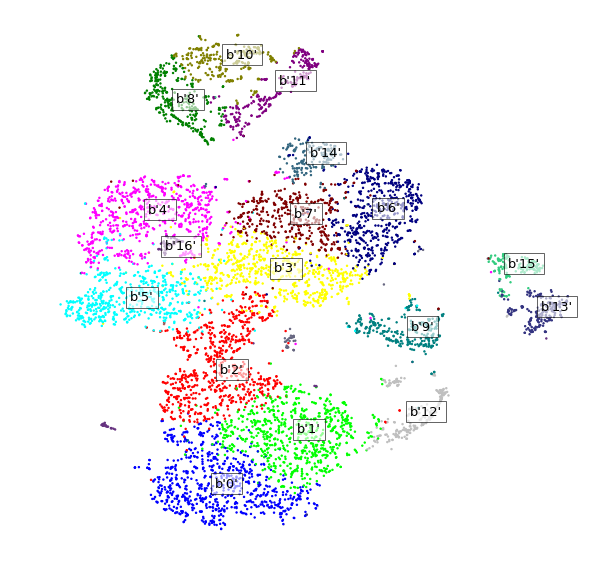

In [13]:
# Plot TSNE
plt.figure(figsize=(10,10))
vcy.scatter_viz(vlm_epi.ts[:,0], vlm_epi.ts[:,1], c=vlm_epi.colorandum, s=2)
for i in range(max(vlm_epi.ca["res12_epi"].astype(int))):
    ts_m = np.median(vlm_epi.ts[vlm_epi.ca["res12_epi"].astype(int) == i, :], 0)
    plt.text(ts_m[0], ts_m[1], str(vlm_epi.cluster_labels[vlm_epi.ca["res12_epi"].astype(int) == i][0]),
             fontsize=13, bbox={"facecolor":"w", "alpha":0.6})
plt.axis("off");

In [14]:
def plot_fractions_cluster(self, save2file: str=None) -> None:
        """Plots a barplot showing the abundance of spliced/unspliced molecules in the dataset

        Arguments
        ---------
        save2file: str (default: None)
            If not None specifies the file path to which plots get saved

        Returns
        -------
        Nothing, it plots a barplot
        """
        plt.figure(figsize=(15, 5))
        try:
            chips, chip_ix = np.unique(self.ca["res12_epi"], return_inverse=1)
        except KeyError:
            chips, chip_ix = np.unique([i.split(":")[0] for i in self.ca["CellID"]], return_inverse=1)
        n = len(chips)
        for i in np.unique(chip_ix):
            tot_mol_cell_submatrixes = [X[:, chip_ix == i].sum(0) for X in [self.S, self.A, self.U]]
            total = np.sum(tot_mol_cell_submatrixes, 0)
            _mean = [np.mean(j / total) for j in tot_mol_cell_submatrixes]
            _std = [np.std(j / total) for j in tot_mol_cell_submatrixes]
            plt.ylabel("Fraction")
            plt.bar(np.linspace(-0.2, 0.2, n)[i] + np.arange(3), _mean, 0.5 / (n * 1.05), label=chips[i])
            plt.errorbar(np.linspace(-0.2, 0.2, n)[i] + np.arange(3), _mean, _std, c="k", fmt="none", lw=1, capsize=2)

            # Hide the right and top spines
            plt.gca().spines['right'].set_visible(False)
            plt.gca().spines['top'].set_visible(False)
            # Only show ticks on the left and bottom spines
            plt.gca().yaxis.set_ticks_position('left')
            plt.gca().xaxis.set_ticks_position('bottom')
            plt.gca().spines['left'].set_bounds(0, 0.8)
            plt.legend(ncol=5)
            
        plt.xticks(np.arange(3), ["spliced", "ambiguous", "unspliced"])
        plt.tight_layout()
        if save2file:
            plt.savefig(save2file, bbox_inches="tight")

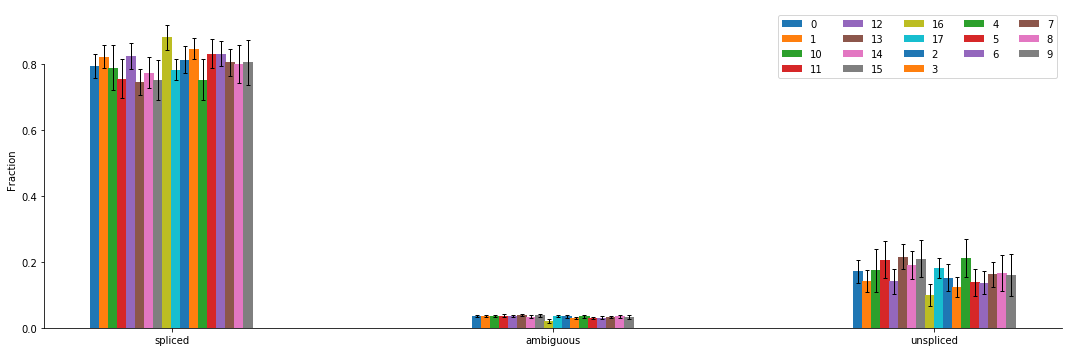

In [15]:
plot_fractions_cluster(vlm_epi)

In [16]:
vlm_epi.filter_cells(bool_array=vlm_epi.initial_Ucell_size > np.percentile(vlm_epi.initial_Ucell_size, 0.2))


In [ ]:
#initial_cell_size: int
        #The sum of spliced molecules
    #initial_Ucell_size: int
        #The sum of unspliced molecules

In [17]:
vlm_epi.ts = np.column_stack([vlm_epi.ca["TSNE1_epi"], vlm_epi.ca["TSNE2_epi"]])


In [ ]:
#min_expr_counts: float
            #The minimum number of spliced molecules detected considering all the cells default is 50
        #min_cells_express: float
            #The minimum number of cells that express spliced molecules of a gene default is 20
        #min_expr_counts_U: float
            #The minimum number of unspliced molecules detected considering all the cells default is 0
        #min_cells_express_U: float
            #The minimum number of cells that express unspliced molecules of a gene default is 0
        #Note: the conditions are combined by and "&" logical operator

In [18]:
vlm_epi.score_detection_levels(min_expr_counts=50, min_cells_express=20)
vlm_epi.filter_genes(by_detection_levels=True)

2019-06-23 22:03:33,034 - DEBUG - Filtering by detection level


In [ ]:
# """Rank genes on the basis of a CV vs mean fit, it uses a nonparametric fit (Support Vector Regression)

 #       Arguments
  #      ---------
   #     N: int
    #        the number to select
     #   min_expr_cells: int, (default=2)
      #      minimum number of cells that express that gene for it to be considered in the fit
       # min_expr_avg: int, (default=0)
        #    The minimum average accepted before discarding from the the gene as not expressed
        #max_expr_avg: float, (default=20)
         #   The maximum average accepted before discarding from the the gene as house-keeping/outlier
        #svr_gamma: float
         #   the gamma hyper-parameter of the SVR
        #winsorize: bool
         #   Wether to winsorize the data for the cv vs mean model
        #winsor_perc: tuple, default=(1, 99.5)
         #   the up and lower bound of the winsorization
        #sort_inverse: bool, (default=False)
         #   if True it sorts genes from less noisy to more noisy (to use for size estimation not for feature selection)
        #which: bool, (default="S")
         #   it performs the same cv_vs mean procedure on spliced "S" or unspliced "U" count
          #  "both" is NOT supported here because most often S the two procedure would have different parameters
           # (notice that default parameters are good heuristics only for S)
        #plot: bool, default=False
         #   whether to show a plot

2019-06-23 22:03:48,795 - DEBUG - svr_gamma set to 0.010625487001487568
2019-06-23 22:04:03,519 - DEBUG - Filtering by cv vs mean


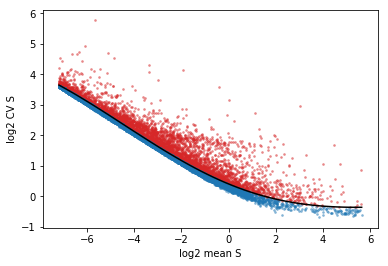

In [19]:
vlm_epi.score_cv_vs_mean(5000, plot=True, max_expr_avg=50)
vlm_epi.filter_genes(by_cv_vs_mean=True)

In [20]:
vlm_epi.score_detection_levels(min_expr_counts=30, min_cells_express=10, min_expr_counts_U=0, min_cells_express_U=0)
vlm_epi.score_cluster_expression(min_avg_U=0.01, min_avg_S=0.08)
vlm_epi.filter_genes(by_detection_levels=True, by_cluster_expression=True)

2019-06-23 22:04:17,929 - INFO - Cluster: b'0' (797 cells)
2019-06-23 22:04:18,024 - INFO - Cluster: b'1' (763 cells)
2019-06-23 22:04:18,115 - INFO - Cluster: b'10' (269 cells)
2019-06-23 22:04:18,151 - INFO - Cluster: b'11' (270 cells)
2019-06-23 22:04:18,187 - INFO - Cluster: b'12' (235 cells)
2019-06-23 22:04:18,219 - INFO - Cluster: b'13' (212 cells)
2019-06-23 22:04:18,249 - INFO - Cluster: b'14' (175 cells)
2019-06-23 22:04:18,273 - INFO - Cluster: b'15' (153 cells)
2019-06-23 22:04:18,295 - INFO - Cluster: b'16' (86 cells)
2019-06-23 22:04:18,308 - INFO - Cluster: b'17' (37 cells)
2019-06-23 22:04:18,384 - INFO - Cluster: b'2' (754 cells)
2019-06-23 22:04:18,473 - INFO - Cluster: b'3' (701 cells)
2019-06-23 22:04:18,557 - INFO - Cluster: b'4' (673 cells)
2019-06-23 22:04:18,637 - INFO - Cluster: b'5' (579 cells)
2019-06-23 22:04:18,706 - INFO - Cluster: b'6' (572 cells)
2019-06-23 22:04:18,775 - INFO - Cluster: b'7' (412 cells)
2019-06-23 22:04:18,827 - INFO - Cluster: b'8' (33

In [21]:
# best with sample and expression scaling
vlm_epi._normalize_S(relative_size=vlm_epi.initial_cell_size,
                 target_size=np.mean(vlm_epi.initial_cell_size))
vlm_epi._normalize_U(relative_size=vlm_epi.initial_Ucell_size,
                 target_size=np.mean(vlm_epi.initial_Ucell_size))

13

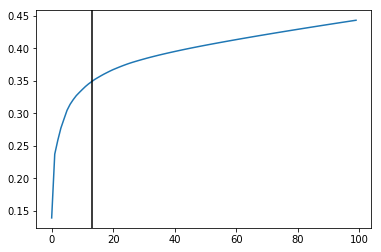

In [22]:
vlm_epi.perform_PCA()
plt.plot(np.cumsum(vlm_epi.pca.explained_variance_ratio_)[:100])
n_comps_epi = np.where(np.diff(np.diff(np.cumsum(vlm_epi.pca.explained_variance_ratio_))>0.003))[0][0]
plt.axvline(n_comps_epi, c="k")
n_comps_epi

In [23]:
k_epi = 150
#k: int number of neighbors. If None the default it is chosen to be `0.025 * Ncells`
vlm_epi.knn_imputation(n_pca_dims=n_comps_epi, k=k_epi, balanced=True, b_sight=k_epi*6, b_maxl=k_epi*3.5, n_jobs=16)

2019-06-23 22:05:03,325 - DEBUG - First search the 900 nearest neighbours for 7301
2019-06-23 22:05:06,403 - DEBUG - Using the initialization network to find a 150-NN graph with maximum connectivity of 525.0
2019-06-23 22:05:06,492 - DEBUG - Returning sparse matrix


In [24]:
vlm_epi.fit_gammas(limit_gamma=False, fit_offset=False)


In [25]:
vlm_epi.predict_U()
vlm_epi.calculate_velocity()
vlm_epi.calculate_shift(assumption="constant_velocity")
vlm_epi.extrapolate_cell_at_t(delta_t=1.)

In [201]:
#!mkdir figures_bw

2019-02-13 02:27:26,677 - DEBUG - Assigning font /b'F1' = '/home/ubuntu/miniconda3/envs/velocyto/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
2019-02-13 02:27:28,151 - DEBUG - Embedding font /home/ubuntu/miniconda3/envs/velocyto/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
2019-02-13 02:27:28,152 - DEBUG - Writing TrueType font.


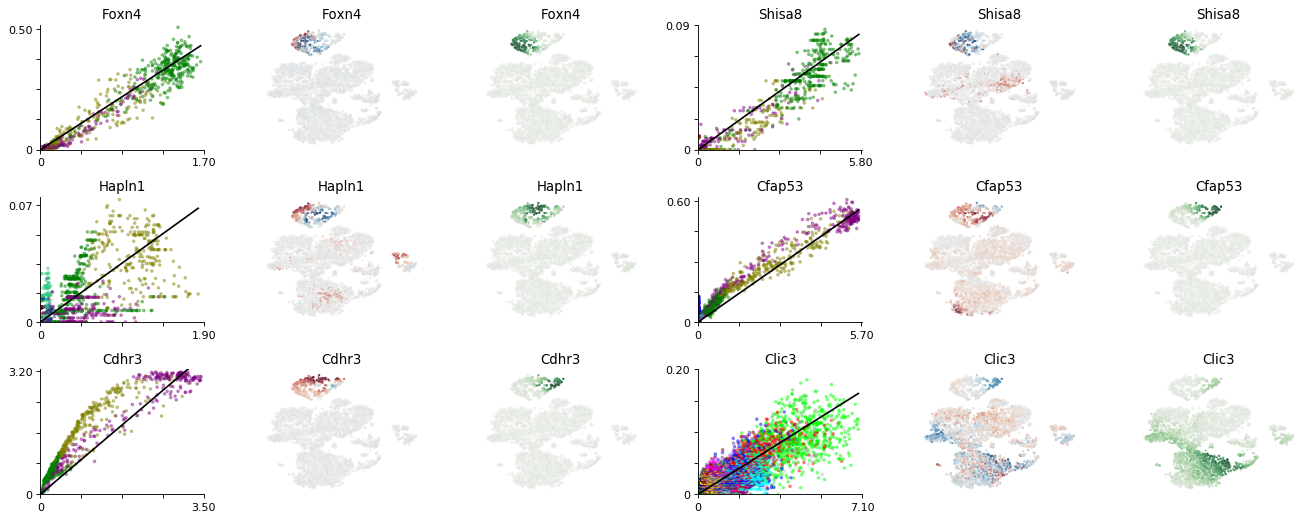

In [28]:
plt.figure(None, (16.5,15), dpi=80)
gs = plt.GridSpec(7,6)
for i, gn in enumerate(["Foxn4","Shisa8","Hapln1","Cfap53", "Cdhr3","Clic3"]):
    ax = plt.subplot(gs[i*3])
    try:
        ix=np.where(vlm_epi.ra["Gene"] == gn)[0][0]
    except:
        continue
    vcy.scatter_viz(vlm_epi.Sx_sz[ix,:], vlm_epi.Ux_sz[ix,:], c=vlm_epi.colorandum, s=5, alpha=0.4, rasterized=True)
    plt.title(gn)
    xnew = np.linspace(0,vlm_epi.Sx[ix,:].max())
    plt.plot(xnew, vlm_epi.gammas[ix] * xnew + vlm_epi.q[ix], c="k")
    plt.ylim(0, np.max(vlm_epi.Ux_sz[ix,:])*1.02)
    plt.xlim(0, np.max(vlm_epi.Sx_sz[ix,:])*1.02)
    minimal_yticks(0, np.max(vlm_epi.Ux_sz[ix,:])*1.02)
    minimal_xticks(0, np.max(vlm_epi.Sx_sz[ix,:])*1.02)
    despline()
    
    vlm_epi.plot_velocity_as_color(gene_name=gn, gs=gs[i*3+1], s=3, rasterized=True)

    vlm_epi.plot_expression_as_color(gene_name=gn, gs=gs[i*3+2], s=3, rasterized=True)
    
plt.tight_layout()
plt.savefig("Dec_trachea/E16_Dec7_combined_v3/Suppl_phase_selection.pdf")

In [26]:
vlm_epi.estimate_transition_prob(hidim="Sx_sz", embed="ts", transform="sqrt", psc=1,
                             n_neighbors=150, knn_random=True, sampled_fraction=1)

2019-06-23 22:08:35,965 - DEBUG - Calculate KNN in the embedding space
2019-06-23 22:08:38,454 - DEBUG - Correlation Calculation 'knn_random'
2019-06-23 22:08:47,631 - DEBUG - Correlation Calculation for negative control
2019-06-23 22:08:55,054 - DEBUG - Done Correlation Calculation


In [29]:
vlm_epi.calculate_embedding_shift(sigma_corr = 0.05, expression_scaling=False)
vlm_epi.calculate_grid_arrows(smooth=0.8, steps=(40, 40), n_neighbors=100)

2019-06-23 22:10:06,554 - DEBUG - Calculate transition probability
2019-06-23 22:10:07,697 - DEBUG - Calculate transition probability for negative control


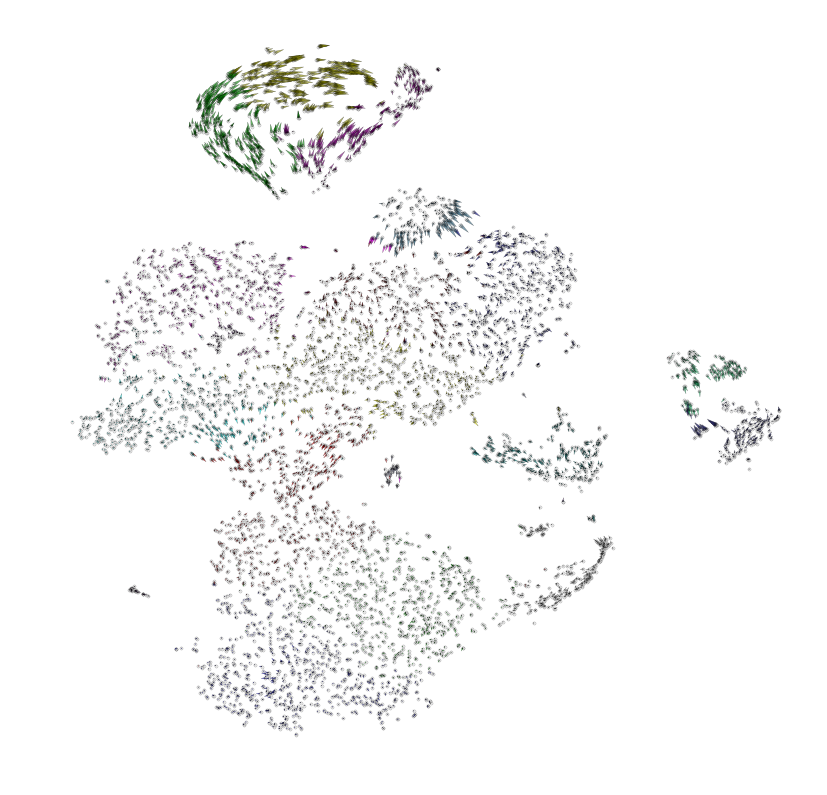

In [413]:
plt.figure(None,(14,14))
quiver_scale = 60

plt.scatter(vlm_epi.embedding[:, 0], vlm_epi.embedding[:, 1],
            c="0.8", alpha=0.2, s=10, edgecolor="")

ix_choice = np.random.choice(vlm_epi.embedding.shape[0], size=int(vlm_epi.embedding.shape[0]/1.), replace=False)
plt.scatter(vlm_epi.embedding[ix_choice, 0], vlm_epi.embedding[ix_choice, 1],
            c="0.8", alpha=0.4, s=10, edgecolor=(0,0,0,1), lw=0.3, rasterized=True)

quiver_kwargs=dict(headaxislength=10, headlength=15, headwidth=5,linewidths=0.25, width=0.001,edgecolors="k", color=vlm_epi.colorandum[ix_choice], alpha=0.6)
plt.quiver(vlm_epi.embedding[ix_choice, 0], vlm_epi.embedding[ix_choice, 1],
           vlm_epi.delta_embedding[ix_choice, 0], vlm_epi.delta_embedding[ix_choice, 1],
           scale=quiver_scale, **quiver_kwargs)

plt.axis("off")
plt.savefig("Dec_trachea/E16_Dec7_combined_v3/epi_full_arrows.pdf")